## Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import classification_report,confusion_matrix
import warnings
warnings.filterwarnings('ignore')

## Importing Data

In [2]:
df = pd.read_csv("cleveland.csv")

In [3]:
df

,age,sex,cp,tresbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## DATA EXPLORATION : : : Statistical and Visualization¶

In [4]:
df.describe()

,age,sex,cp,tresbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.712871,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,0.979965,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      303 non-null    int64  
 1   sex      303 non-null    int64  
 2   cp       303 non-null    int64  
 3   tresbps  303 non-null    int64  
 4   chol     303 non-null    int64  
 5   fbs      303 non-null    int64  
 6   restecg  303 non-null    int64  
 7   thalach  303 non-null    int64  
 8   exang    303 non-null    int64  
 9   oldpeak  303 non-null    float64
 10  slope    303 non-null    int64  
 11  ca       303 non-null    int64  
 12  thal     303 non-null    int64  
 13  output   303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.isnull().sum()

age        0
sex        0
cp         0
tresbps    0
chol       0
fbs        0
restecg    0
thalach    0
exang      0
oldpeak    0
slope      0
ca         0
thal       0
output     0
dtype: int64

In [7]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
298    False
299    False
300    False
301    False
302    False
Length: 303, dtype: bool

In [8]:
df.duplicated().sum()

0

In [9]:
df["output"].unique()

array([1, 0])

In [10]:
df["output"].value_counts()

output
1    165
0    138
Name: count, dtype: int64

<Axes: xlabel='output', ylabel='count'>

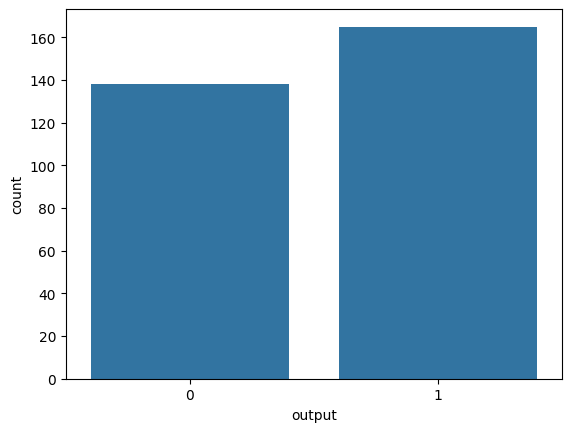

In [11]:
sns.countplot(x = "output", data = df)

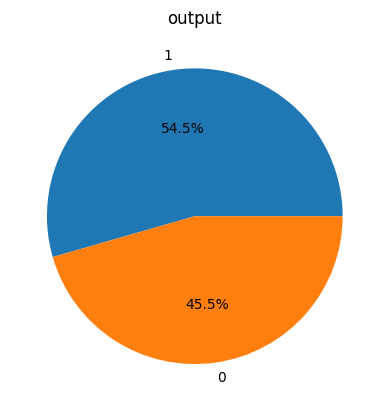

In [12]:
value_counts = df["output"].value_counts()

plt.pie(value_counts, labels = value_counts.index, autopct = "%1.1f%%")
plt.title("output")
plt.show()

## Preprocessing & Exploration

In [13]:
df.head()

,age,sex,cp,tresbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<Axes: >

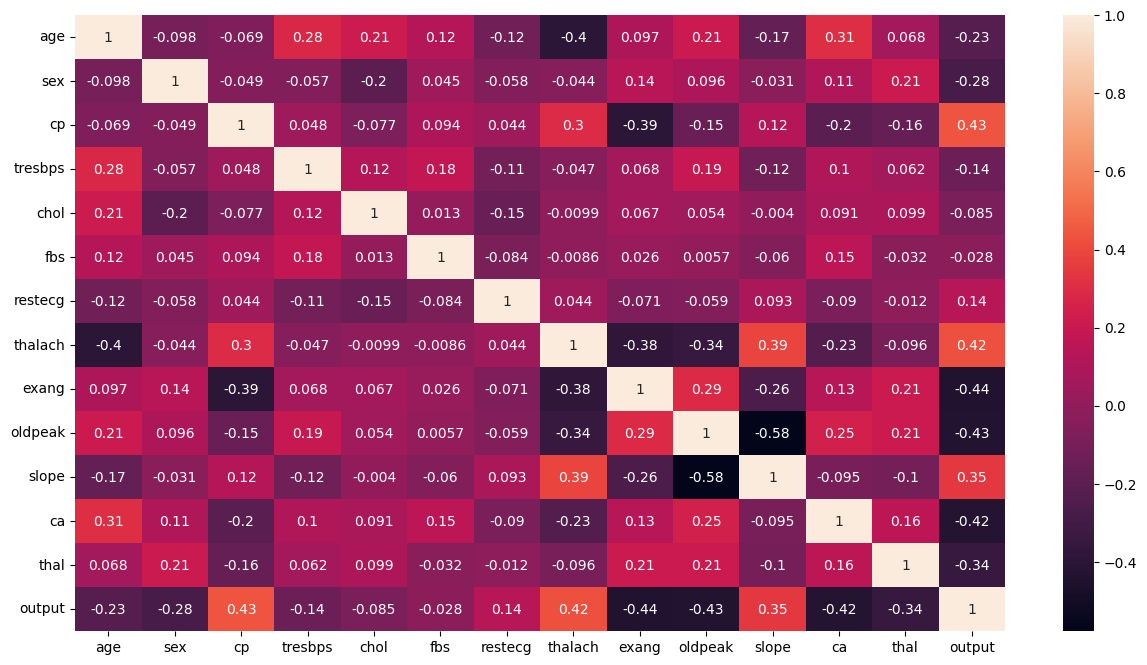

In [14]:
plt.figure(figsize = (15, 8))
sns.heatmap(df.corr(), annot = True)

In [15]:
x = df.iloc[:, :-1]
y = df.iloc[:,-1]

## Feature Selection (Preprocessing)

Selected Features:
['thal', 'ca', 'sex', 'chol', 'thalach', 'restecg', 'cp', 'oldpeak', 'slope', 'exang']


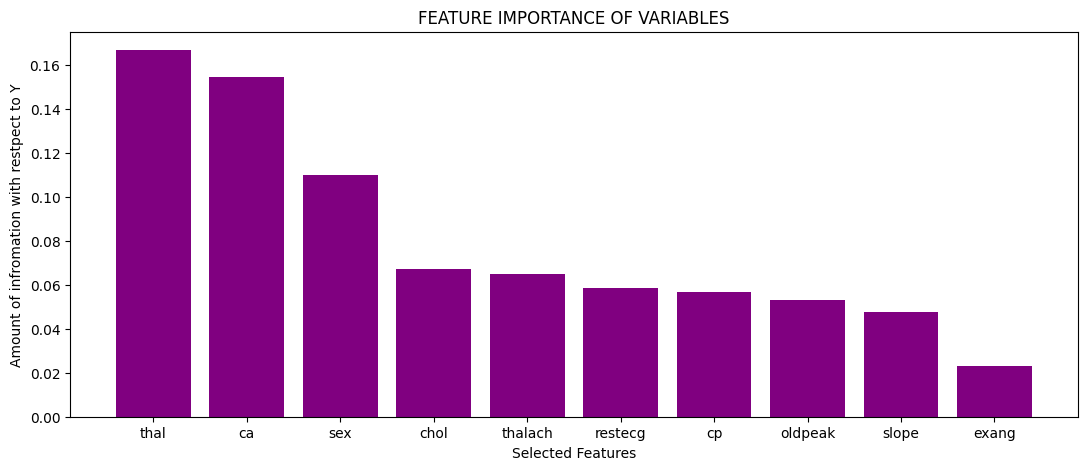

In [16]:
from sklearn.feature_selection import SelectKBest,mutual_info_regression,f_regression
import numpy as np
import matplotlib.pyplot as plt
k = 10
selector = SelectKBest(score_func=mutual_info_regression, k=k)
x_selected = selector.fit_transform(x, y)
selected_indices = np.argsort(selector.scores_)[::-1][:k]
selected_features = list(x.columns[selected_indices])

# Print the selected features
print("Selected Features:")
print(selected_features)
plt.figure(figsize=(13,5))
plt.bar(selected_features,selector.scores_[selected_indices[range(k)]],color='purple')
#plt.plot(selected_features,selector.scores_[selected_indices[range(k)]],color='red')
plt.xlabel('Selected Features')
plt.ylabel('Amount of infromation with restpect to Y')
plt.title('FEATURE IMPORTANCE OF VARIABLES')
plt.show()

In [17]:
x = df[['cp', 'oldpeak', 'thal', 'exang', 'thalach', 'slope', 'ca', 'chol', 'fbs', 'restecg']]

In [18]:
x

,cp,oldpeak,thal,exang,thalach,slope,ca,chol,fbs,restecg
0,3,2.3,1,0,150,0,0,233,1,0
1,2,3.5,2,0,187,0,0,250,0,1
2,1,1.4,2,0,172,2,0,204,0,0
3,1,0.8,2,0,178,2,0,236,0,1
4,0,0.6,2,1,163,2,0,354,0,1
...,...,...,...,...,...,...,...,...,...,...
298,0,0.2,3,1,123,1,0,241,0,1
299,3,1.2,3,0,132,1,0,264,0,1
300,0,3.4,3,0,141,1,2,193,1,1
301,0,1.2,3,1,115,1,1,131,0,1


## Feature Scalling (Data Standardization)

In [19]:
sc = StandardScaler()
x = sc.fit_transform(x)

## Class Balancing

In [20]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x, y = smote.fit_resample(x, y)

## Splitting for Training and Testing

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test = train_test_split(x,y, test_size = 0.15)

## 1. Bagging Classifier Model ::::  Evaluation (using Confusion Matrix)

              precision    recall  f1-score   support

           0       0.80      0.73      0.76        22
           1       0.80      0.86      0.83        28

    accuracy                           0.80        50
   macro avg       0.80      0.79      0.79        50
weighted avg       0.80      0.80      0.80        50



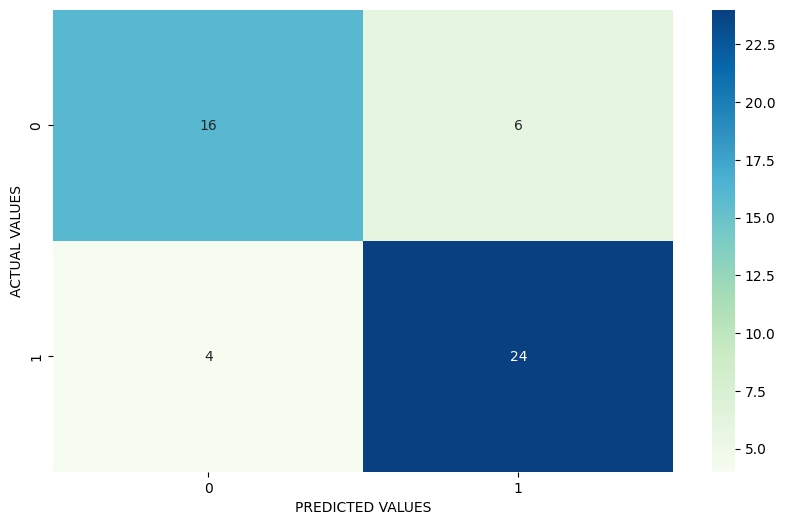

In [22]:
from sklearn.ensemble import BaggingClassifier

bagging_model = BaggingClassifier()
bagging_model.fit(x_train, y_train)
y_pred = bagging_model.predict(x_test)
print(classification_report(y_test,y_pred))

## Evaluating the Accuracy of the Model
plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='.0f',cmap='GnBu')
fx.set_xlabel('PREDICTED VALUES')
fx.set_ylabel('ACTUAL VALUES')
plt.show()

## Model Validation

In [23]:
y_pred[:100]

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0])

In [24]:
# Actual Values

y_test.values[:100]

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0])

## 2. Random Forest Model :::: Evaluation

              precision    recall  f1-score   support

           0       0.68      0.83      0.75        18
           1       0.89      0.78      0.83        32

    accuracy                           0.80        50
   macro avg       0.79      0.81      0.79        50
weighted avg       0.82      0.80      0.80        50



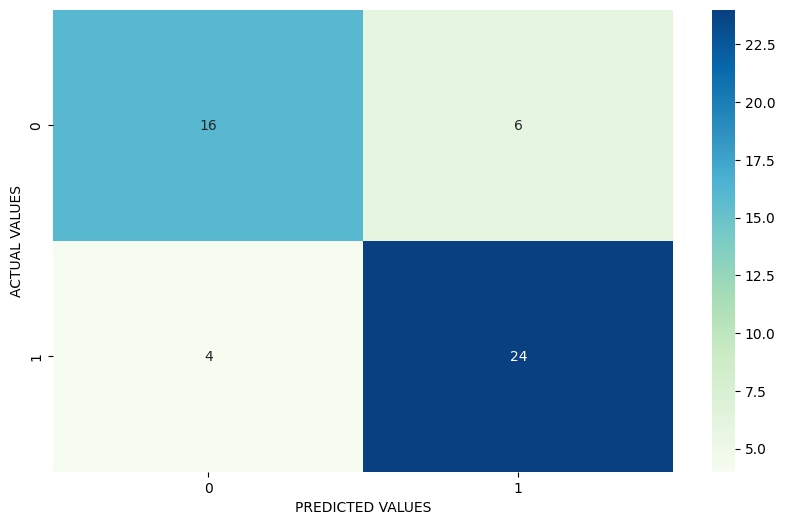

In [25]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)
rf_pred = rf_model.predict(x_test)
print(classification_report(rf_pred, y_test))


## Evaluating the Model Accuracy
plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='.0f',cmap='GnBu')
fx.set_xlabel('PREDICTED VALUES')
fx.set_ylabel('ACTUAL VALUES')
plt.show()

## Model Validation

In [26]:
rf_pred[:100]

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0])

In [27]:
y_test.values[:100]

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0])